<a href="https://colab.research.google.com/github/nadikris2/Edge-Detection/blob/main/Detection_Edge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

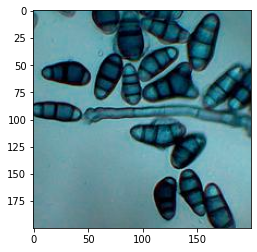

In [3]:
import numpy
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('Bakteri_A.jpeg')
plt.imshow(img)

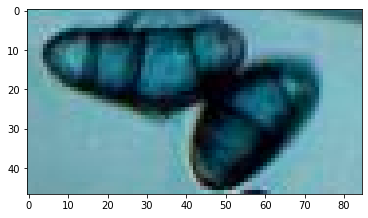

In [4]:
image = img[100:147, 85:170]
plt.imshow(image)


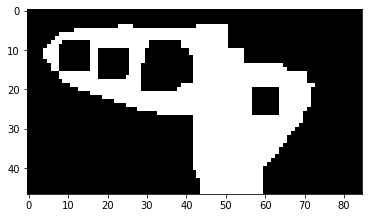

In [5]:
image_grayscale = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
ret,target = cv.threshold(image_grayscale,50,255,cv.THRESH_BINARY_INV)

kernel = numpy.ones((7,7),numpy.uint8)

penutupan = cv.morphologyEx(target, cv.MORPH_CLOSE, kernel)
plt.imshow(penutupan, 'gray')

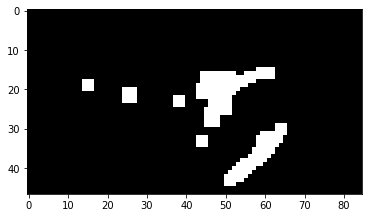

In [6]:
ret,target2 = cv.threshold(image_grayscale,20,255,cv.THRESH_BINARY_INV)

kernel_buka = numpy.ones((3,3),numpy.uint8)

pembukaan = cv.morphologyEx(target2, cv.MORPH_OPEN, kernel_buka)
plt.imshow(pembukaan, 'gray')


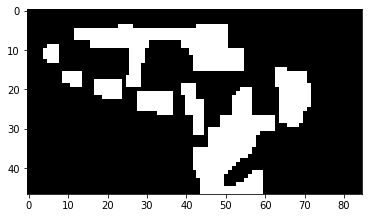

In [7]:
hasil = cv.subtract(penutupan, pembukaan)
result_open = cv.morphologyEx(hasil, cv.MORPH_OPEN, kernel_buka)
plt.imshow(result_open, 'gray')

In [8]:
def get_centroid(contour):
  M = cv.moments(contour)

  cx = int(M['m10']/M['m00'])
  cy = int(M['m01']/M['m00'])

  return (cx, cy)

In [9]:
contours,hierarchy = cv.findContours(result_open, 1, 2)

centroid_1 = get_centroid(contours[0])
centroid_2 = get_centroid(contours[1])

print( "Centroid 1 :", centroid_1 )
print( "centroid 2 :", centroid_2 )

Centroid 1 : (32, 23)
centroid 2 : (51, 34)


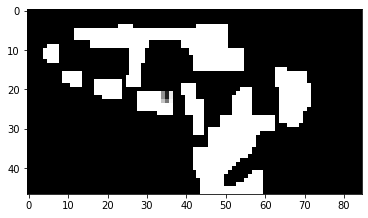

In [10]:
hasil_open_dan_text = cv.putText(
    result_open, '1', centroid_1, 
    cv.FONT_HERSHEY_SCRIPT_SIMPLEX, 
   0.25, (0, 0, 0), 1, cv.LINE_AA)

hasil_open_dan_text = cv.putText(
    result_open, '2', centroid_2, 
    cv.FONT_HERSHEY_SCRIPT_SIMPLEX, 
   0.25, (255, 255, 255), 1, cv.LINE_AA)

plt.imshow(hasil_open_dan_text, 'gray')

In [11]:
import math

def euclidean_distance(p1, p2):
  a = p1[0] - p2[0]
  b = p1[1] - p2[1]

  return math.sqrt( a*a + b*b )

In [12]:
dist = euclidean_distance(centroid_1, centroid_2)

print("Jarak antar kedua objek adalah", dist)

Jarak antar kedua objek adalah 21.95449840010015
